In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from nltk.cluster import KMeansClusterer, euclidean_distance
import nltk

In [2]:
dat = pd.read_csv("./FIFA_2018_Statistics.csv");
# simple univariate stats
dat.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


In [3]:
# lets see the columns
print(dat.columns);
print("Total # features {}".format(len(dat.columns)));

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')
Total # features 27


In [4]:
dat.iloc[0:3,0:7]

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0
2,15-06-2018,Egypt,Uruguay,0,43,8,3


In [5]:
dat.iloc[0:3,np.concatenate(([1,2],range(7,14)))]

,Team,Opponent,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %
0,Russia,Saudi Arabia,3,3,6,3,11,0,78
1,Saudi Arabia,Russia,3,3,2,1,25,2,86
2,Egypt,Uruguay,3,2,0,1,7,3,78


In [6]:
dat.iloc[0:3,np.concatenate(([1,2],range(14,21)))]

,Team,Opponent,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match
0,Russia,Saudi Arabia,306,118,22,0,0,0,Yes
1,Saudi Arabia,Russia,511,105,10,0,0,0,No
2,Egypt,Uruguay,395,112,12,2,0,0,No


In [7]:
dat.iloc[0:3,np.concatenate(([1,2],range(21,27)))]

,Team,Opponent,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,Russia,Saudi Arabia,12.0,Group Stage,No,0,NaN,NaN
1,Saudi Arabia,Russia,NaN,Group Stage,No,0,NaN,NaN
2,Egypt,Uruguay,NaN,Group Stage,No,0,NaN,NaN


In [8]:
numeric_features = dat.select_dtypes(include=[np.number]).columns;
print(dat.isnull().sum()/len(dat))
#dat_prct_missing = pd.DataFrame({"Features":dat.columns, \
#               "percent_missing_val":dat.isnull().sum()/len(dat)}, index=None)
#print(dat_prct_missing)
#print(numeric_features)

Date                      0.000000
Team                      0.000000
Opponent                  0.000000
Goal Scored               0.000000
Ball Possession %         0.000000
Attempts                  0.000000
On-Target                 0.000000
Off-Target                0.000000
Blocked                   0.000000
Corners                   0.000000
Offsides                  0.000000
Free Kicks                0.000000
Saves                     0.000000
Pass Accuracy %           0.000000
Passes                    0.000000
Distance Covered (Kms)    0.000000
Fouls Committed           0.000000
Yellow Card               0.000000
Yellow & Red              0.000000
Red                       0.000000
Man of the Match          0.000000
1st Goal                  0.265625
Round                     0.000000
PSO                       0.000000
Goals in PSO              0.000000
Own goals                 0.906250
Own goal Time             0.906250
dtype: float64


In [9]:
#replace man of the match column with boolean values
dat["Man of the Match"]= dat["Man of the Match"].map(lambda x: 1  if x=="Yes" else 0)
dat["count"] = 1;
dat.iloc[0:3,np.concatenate(([1,2],range(14,21)))]
# lets see how many games were played in each stage
stage_games = pd.pivot_table(dat, values ='count', index=['Round'],aggfunc=np.sum);
print(stage_games.divide(2))

                count
Round                
3rd Place           1
Final               1
Group Stage        48
Quarter Finals      4
Round of 16         8
Semi- Finals        2


In [10]:
dat_gs = dat[dat["Round"]=="Group Stage"].drop(columns=["Round"]);
#dat_gs.head()

corr = dat_gs[numeric_features].corr();
fig = plt.figure();
fig.set_size_inches(18,10);
ax = fig.add_subplot(111);
sns.heatmap(corr,annot=True,robust=True, yticklabels=1)

In [11]:
choicef = ["Team","Opponent","Goal Scored", "Ball Possession %", "Corners", "Off-Target","Attempts",\
           "Free Kicks","Pass Accuracy %","Saves","Distance Covered (Kms)","Man of the Match"]
dat_gs = dat_gs[choicef];

#fig=plt.figure()
#fig.set_size_inches(16,6);
#g = sns.PairGrid(dat_gs[choicef[0:-1]])
#g = g.map_diag(sns.kdeplot)
#g = g.map_offdiag(plt.scatter)
#g = g.add_legend()

In [12]:
grouped_gs = dat_gs.drop(columns=["Opponent", 'Man of the Match']).groupby('Team').agg({'Goal Scored':['sum', 'max'], \
                         'Ball Possession %':'median', \
                         'Corners':'sum', \
                         'Free Kicks':'sum', \
                         'Pass Accuracy %':'median', \
                         'Off-Target':'sum',
                         'Attempts':'sum',                                                               
                         'Distance Covered (Kms)':'sum',                                                              
                         'Saves':'sum'}).astype(float)                                          
                         
grouped_gs.columns = ['_'.join(col) for col in grouped_gs.columns];
grouped_gs.reset_index(level=0, inplace=True);
grouped_gs.iloc[0:3, 0:]

,Team,Goal Scored_sum,Goal Scored_max,Ball Possession %_median,Corners_sum,Free Kicks_sum,Pass Accuracy %_median,Off-Target_sum,Attempts_sum,Distance Covered (Kms)_sum,Saves_sum
0,Argentina,3.0,2.0,66.0,20.0,61.0,84.0,15.0,44.0,303.0,6.0
1,Australia,2.0,1.0,51.0,14.0,37.0,85.0,14.0,32.0,330.0,10.0
2,Belgium,9.0,5.0,52.0,16.0,51.0,88.0,19.0,53.0,312.0,6.0


In [13]:
scaler = MinMaxScaler()
gp_gs_scaled = scaler.fit_transform(grouped_gs.drop(columns=['Team']))

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(gp_gs_scaled)
grouped_gs['kmeans_label'] = kmeans.labels_

In [15]:
grouped_gs[grouped_gs['kmeans_label']==0]['Team']

4         Colombia
10          France
13            Iran
14           Japan
17         Morocco
18         Nigeria
19          Panama
20            Peru
21          Poland
22        Portugal
24    Saudi Arabia
25         Senegal
28          Sweden
30         Tunisia
Name: Team, dtype: object

In [16]:
grouped_gs[grouped_gs['kmeans_label']==1]['Team']

2     Belgium
9     England
23     Russia
Name: Team, dtype: object

In [17]:
grouped_gs[grouped_gs['kmeans_label']==2]['Team']

0       Argentina
3          Brazil
6         Croatia
11        Germany
16         Mexico
27          Spain
29    Switzerland
31        Uruguay
Name: Team, dtype: object

In [18]:
grouped_gs[grouped_gs['kmeans_label']==3]['Team']

1          Australia
5         Costa Rica
7            Denmark
8              Egypt
12           Iceland
15    Korea Republic
26            Serbia
Name: Team, dtype: object

In [19]:
#grouped_gs['kmeans_label'] = grouped_gs['kmeans_label'].map(lambda x: str(x))

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


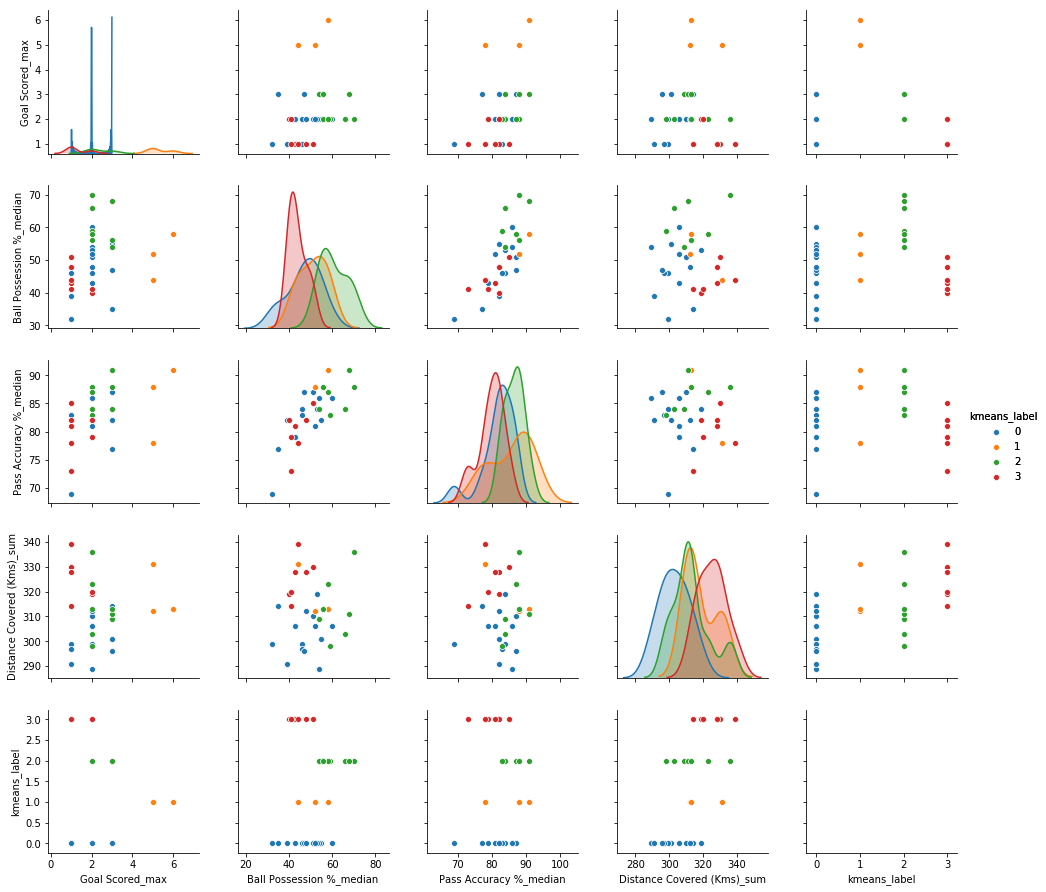

In [20]:
choicef = ["Goal Scored_max", "Ball Possession %_median",\
           "Pass Accuracy %_median","Distance Covered (Kms)_sum","kmeans_label"];
fig=plt.figure()
fig.set_size_inches(16,6);
g = sns.pairplot(grouped_gs[choicef], hue='kmeans_label')
#g = g.map_diag(plt.hist)#g.map_diag(sns.kdeplot)
#g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [21]:
grouped_gs[choicef]

,Goal Scored_max,Ball Possession %_median,Pass Accuracy %_median,Distance Covered (Kms)_sum,kmeans_label
0,2.0,66.0,84.0,303.0,2
1,1.0,51.0,85.0,330.0,3
2,5.0,52.0,88.0,312.0,1
3,2.0,56.0,88.0,313.0,2
4,3.0,55.0,82.0,301.0,0
5,2.0,40.0,82.0,319.0,3
6,3.0,54.0,84.0,309.0,2
7,1.0,48.0,82.0,328.0,3
8,1.0,43.0,81.0,328.0,3
9,6.0,58.0,91.0,313.0,1
